#### Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
df = pd.read_csv("CBB_Listings_LongLat.csv")

In [8]:
# prompt: use describe to provide us the count mean value
desc = df.describe()
print(desc)


       days_on_market     dealer_id       Latitude      Longitude  \
count   145114.000000  1.451140e+05  145114.000000  145114.000000   
mean        47.810218  1.115641e+07      53.539109    -113.531246   
std         57.862393  4.389865e+04       0.183602       1.198429   
min          1.000000  1.112677e+07      22.445247    -113.903261   
25%         14.000000  1.112884e+07      53.539442    -113.589133   
50%         26.000000  1.113164e+07      53.576926    -113.570655   
75%         59.000000  1.116104e+07      53.582383    -113.489730   
max        367.000000  1.125746e+07      53.705860     114.030416   

       dealer_email     vehicle_id           uvc       mileage         price  \
count           0.0  145114.000000  1.451140e+05  1.451140e+05  1.451140e+05   
mean            NaN  513749.054006  2.021818e+09  4.598501e+04  4.786611e+04   
std             NaN   94034.105057  3.557037e+06  6.227304e+04  9.070245e+04   
min             NaN   66737.000000  1.987160e+09  0.000000

In [13]:
df.dtypes

,0
listing_id,object
listing_heading,object
listing_type,object
listing_url,object
listing_first_date,object
days_on_market,int64
dealer_id,int64
dealer_name,object
dealer_street,object
dealer_city,object


In [25]:
#  the average price for used and new cars in dollars

average_price = df.groupby('stock_type')['price'].mean().apply(lambda x: f"${x:,.2f}")
print(average_price)


stock_type
NEW     $63,024.30
USED    $34,446.44
Name: price, dtype: object


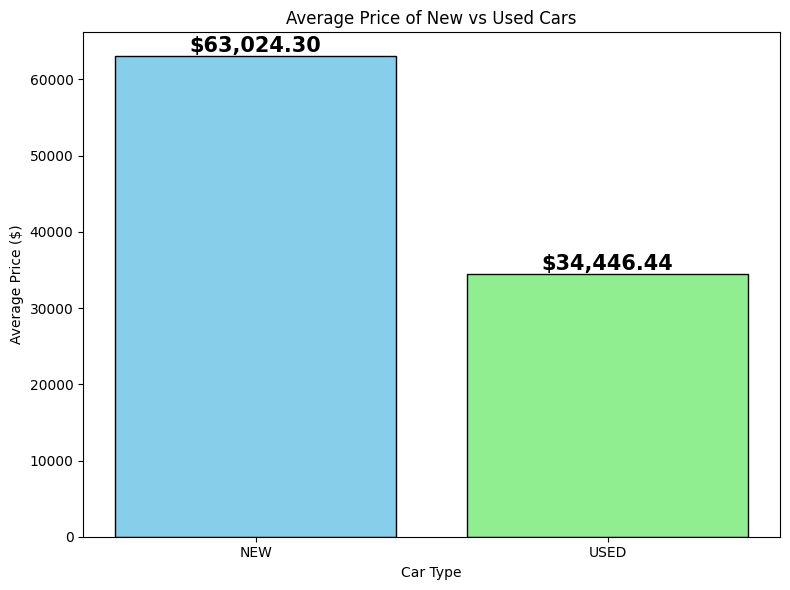

In [29]:
# Creating a bar graph with dollar values displayed on top of each bar
plt.figure(figsize=(8, 6))
average_price_values = df.groupby('stock_type')['price'].mean()
plt.bar(average_price_values.index, average_price_values.values, color=['skyblue', 'lightgreen'], edgecolor='black')

# Adding the dollar values on top of each bar
for index, value in enumerate(average_price_values.values):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom', fontsize=15, fontweight='bold')

plt.title('Average Price of New vs Used Cars')
plt.xlabel('Car Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
